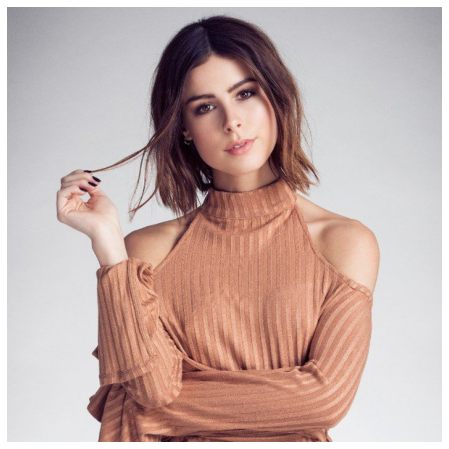

In [35]:
# Python program to read image using matplotlib 

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
  
# Read Images 
img = mpimg.imread('Lena_Meyer-Landrut.jpg') 
  
# Output Images
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img)
plt.show()

In [41]:
np.binary_repr(0, 8)

'00000000'

In [37]:
np.binary_repr(255, 8)

'11111111'

In [140]:
#“Rule 30” could be constructed by first converting to binary and then building an array for each bit
rule_number = 30
rule_string = np.binary_repr(rule_number, 8) #if the binary number has less than 8 digits,
                                             #there are extra zeros in front of the binary number
rule = np.array([int(bit) for bit in rule_string])
print(rule)

[0 0 0 1 1 1 1 0]


In [142]:
bin(30)

'0b11110'

In [43]:
#By convention the Wolfram code associates the leading bit with ‘111’ and the final bit with ‘000’. 
#For rule 30 the relationship between the input, rule index and output is as follows:
for i in range(8):
    triplet = np.binary_repr(i, 3)
    print(f"input:{triplet}, index:{7-i}, output {rule[7-i]}")

input:000, index:7, output 0
input:001, index:6, output 1
input:010, index:5, output 1
input:011, index:4, output 1
input:100, index:3, output 1
input:101, index:2, output 0
input:110, index:1, output 0
input:111, index:0, output 0


In [44]:
#We can define a function which maps the input cell information with the associated rule index. 
#Essentially we are converting the binary input to decimal and adjusting the index range.
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4*L + 2*C + R)
    return int(index)

In [56]:
rng = np.random.RandomState(42)
data = rng.randint(0, 2, 10)
print(rng)
print(data)

RandomState(MT19937)
[0 1 0 0 0 1 0 0 0 1]


In [57]:
#Finally, we can use Numpy to create a data structure containing all the triplets for our state array
#and apply the function across the appropriate axis to determine our new state.
all_triplets = np.stack([np.roll(data, 1), #envía el último elemento al inicio
                         data, 
                         np.roll(data, -1)]) #envía el primer elemento al final

new_data = rule[np.apply_along_axis(rule_index, 0, all_triplets)]
print(new_data)
#That is the process for a single update of our cellular automata.

[0 1 1 0 1 1 1 0 1 1]


In [80]:
print(all_triplets)

[[1 0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 1 0]]


In [81]:
np.apply_along_axis(rule_index, 0, all_triplets)

array([2, 5, 3, 7, 6, 5, 3, 7, 6, 5])

In [82]:
rule

array([0, 0, 0, 1, 1, 1, 1, 0])

In [59]:
#To do many updates and record the state over time, we will create a function.
def CA_run(initial_state, n_steps, rule_number):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])

    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state

    for step in range(1, n_steps):
        all_triplets = np.stack( [np.roll(CA_run[step-1,:], 1), CA_run[step-1,:], np.roll(CA_run[step-1,:], -1), ] )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run

In [104]:
data = CA_run(new_data, 10, 30)
print(data)
np.shape(data)

[[0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0. 1. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


(10, 10)

In [116]:
rng = np.random.RandomState(42)
data = CA_run(rng.randint(0, 2, 100), 64, 26)
print(data)
np.shape(data)

[[0. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 1.]]


(64, 100)

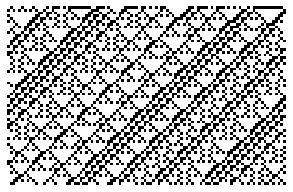

In [117]:
#With random initial state
plt.rcParams['image.cmap'] = 'binary'

rng = np.random.RandomState(42)
data = CA_run(rng.randint(0, 2, 100), 64, 26)

fig, ax = plt.subplots(figsize=(5,5))
ax.matshow(data)
ax.axis(False);

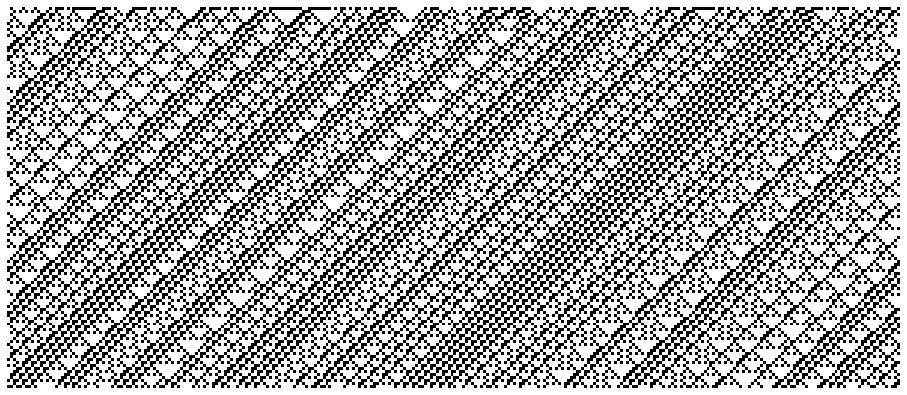

In [130]:
#With random initial state
plt.rcParams['image.cmap'] = 'binary'

rng = np.random.RandomState(42)
data = CA_run(rng.randint(0, 2, 300), 128, 26)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);

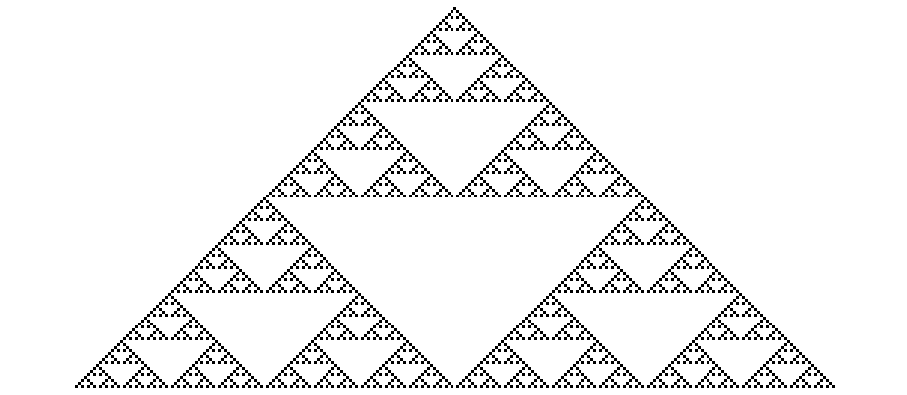

In [101]:
#A single 1 is initialized, with all other values set to zero.
initial = np.zeros(300)
initial[300//2] = 1
data = CA_run(initial, 128, 26)

fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(data)
ax.axis(False);